<a href="https://colab.research.google.com/github/hdonghun/DataScience/blob/main/Marketing_Department_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
creditcard_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Marketing_data.csv')
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
# 전체 컬럼에 대한 mean 확인하기
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# 현금서비스를 가장 많이 받는 고객 데이터를 확인하기.
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [6]:
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

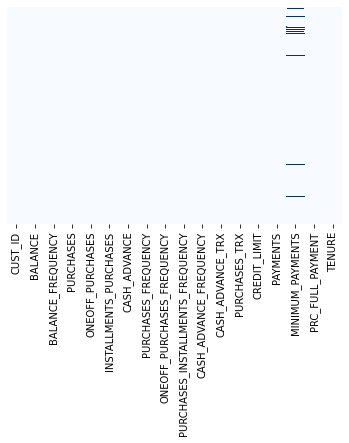

In [7]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap ='Blues')
# 최소 지불 금액에 결측치들이 조금 있다

In [8]:
creditcard_df.isnull().sum()

# MINIMUM_PAYMENTS 최소 지불 금액 항목에 313개의 결측치가 있다.
# Credit_Limit에는 하나의 결측치가 있다.

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
creditcard_df.iloc[0]

CUST_ID                                 C10001
BALANCE                              40.900749
BALANCE_FREQUENCY                     0.818182
PURCHASES                                 95.4
ONEOFF_PURCHASES                           0.0
INSTALLMENTS_PURCHASES                    95.4
CASH_ADVANCE                               0.0
PURCHASES_FREQUENCY                   0.166667
ONEOFF_PURCHASES_FREQUENCY                 0.0
PURCHASES_INSTALLMENTS_FREQUENCY      0.083333
CASH_ADVANCE_FREQUENCY                     0.0
CASH_ADVANCE_TRX                             0
PURCHASES_TRX                                2
CREDIT_LIMIT                            1000.0
PAYMENTS                            201.802084
MINIMUM_PAYMENTS                    139.509787
PRC_FULL_PAYMENT                           0.0
TENURE                                      12
Name: 0, dtype: object

In [10]:
creditcard_df.loc[0]

CUST_ID                                 C10001
BALANCE                              40.900749
BALANCE_FREQUENCY                     0.818182
PURCHASES                                 95.4
ONEOFF_PURCHASES                           0.0
INSTALLMENTS_PURCHASES                    95.4
CASH_ADVANCE                               0.0
PURCHASES_FREQUENCY                   0.166667
ONEOFF_PURCHASES_FREQUENCY                 0.0
PURCHASES_INSTALLMENTS_FREQUENCY      0.083333
CASH_ADVANCE_FREQUENCY                     0.0
CASH_ADVANCE_TRX                             0
PURCHASES_TRX                                2
CREDIT_LIMIT                            1000.0
PAYMENTS                            201.802084
MINIMUM_PAYMENTS                    139.509787
PRC_FULL_PAYMENT                           0.0
TENURE                                      12
Name: 0, dtype: object

In [11]:
# 결측치가 있는 항목의 평균값을 이용하여, 결측치를 채워 넣기 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [12]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# 중복값 확인하기
creditcard_df.duplicated().sum()

0

In [14]:
# 의미가 없는 컬럼 없에기
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [15]:
creditcard_df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [16]:
# 길이 구하기
n = len(creditcard_df.columns)
n

17

In [17]:
# 모든 컬럼의 이름 나타내기
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

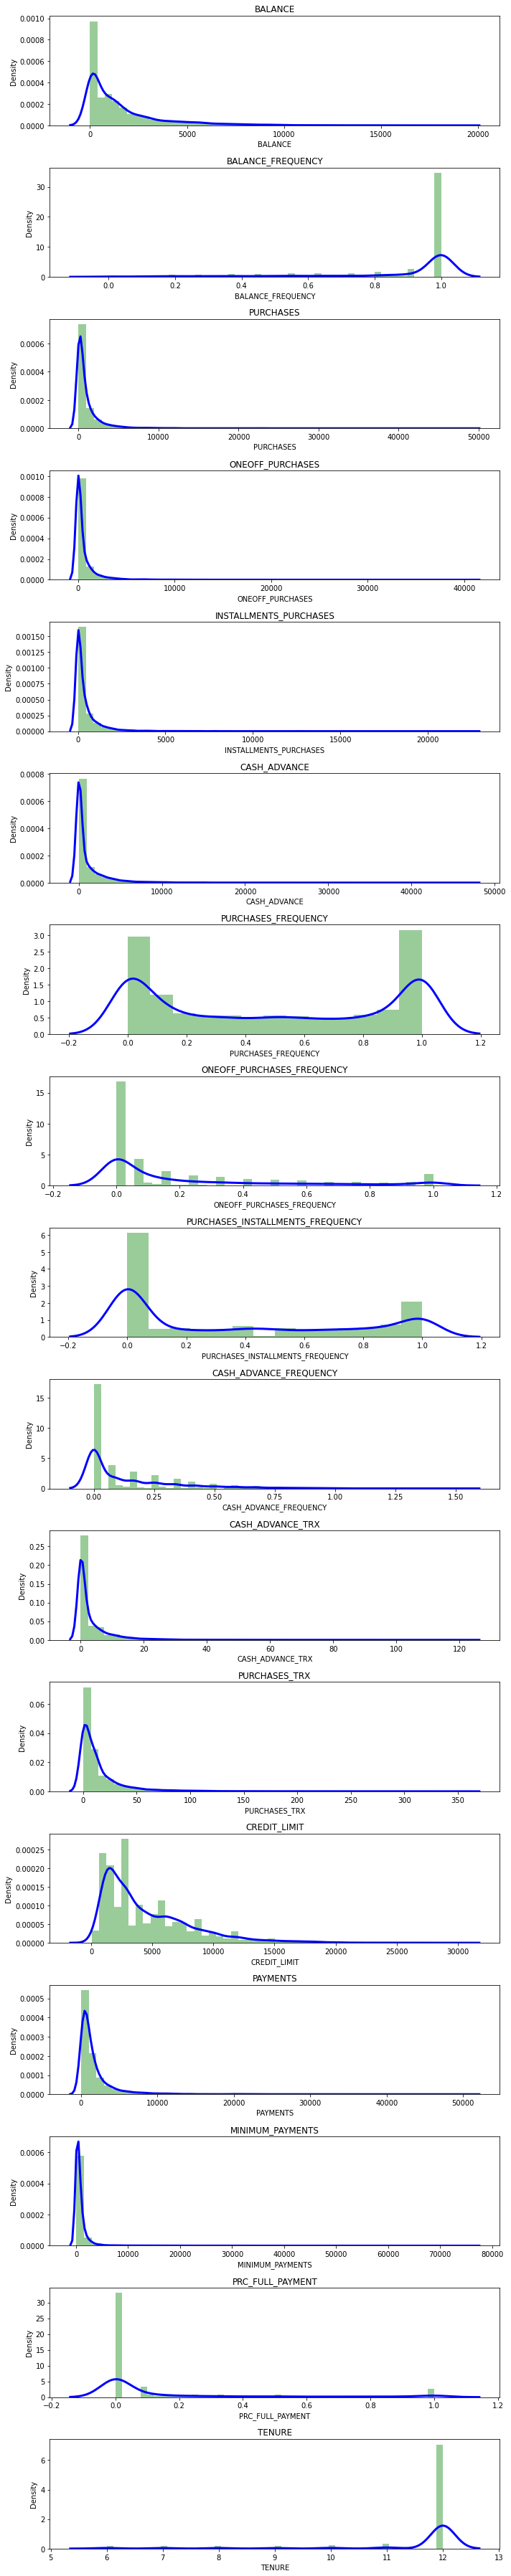

In [18]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

# KDE plot를 사용하여, 커널 밀도 추정치 나타내기
# 연속형 변수의 확률 밀도

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()



In [19]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
# 상관관계 살펴보기
correlations = creditcard_df.corr()
correlations

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


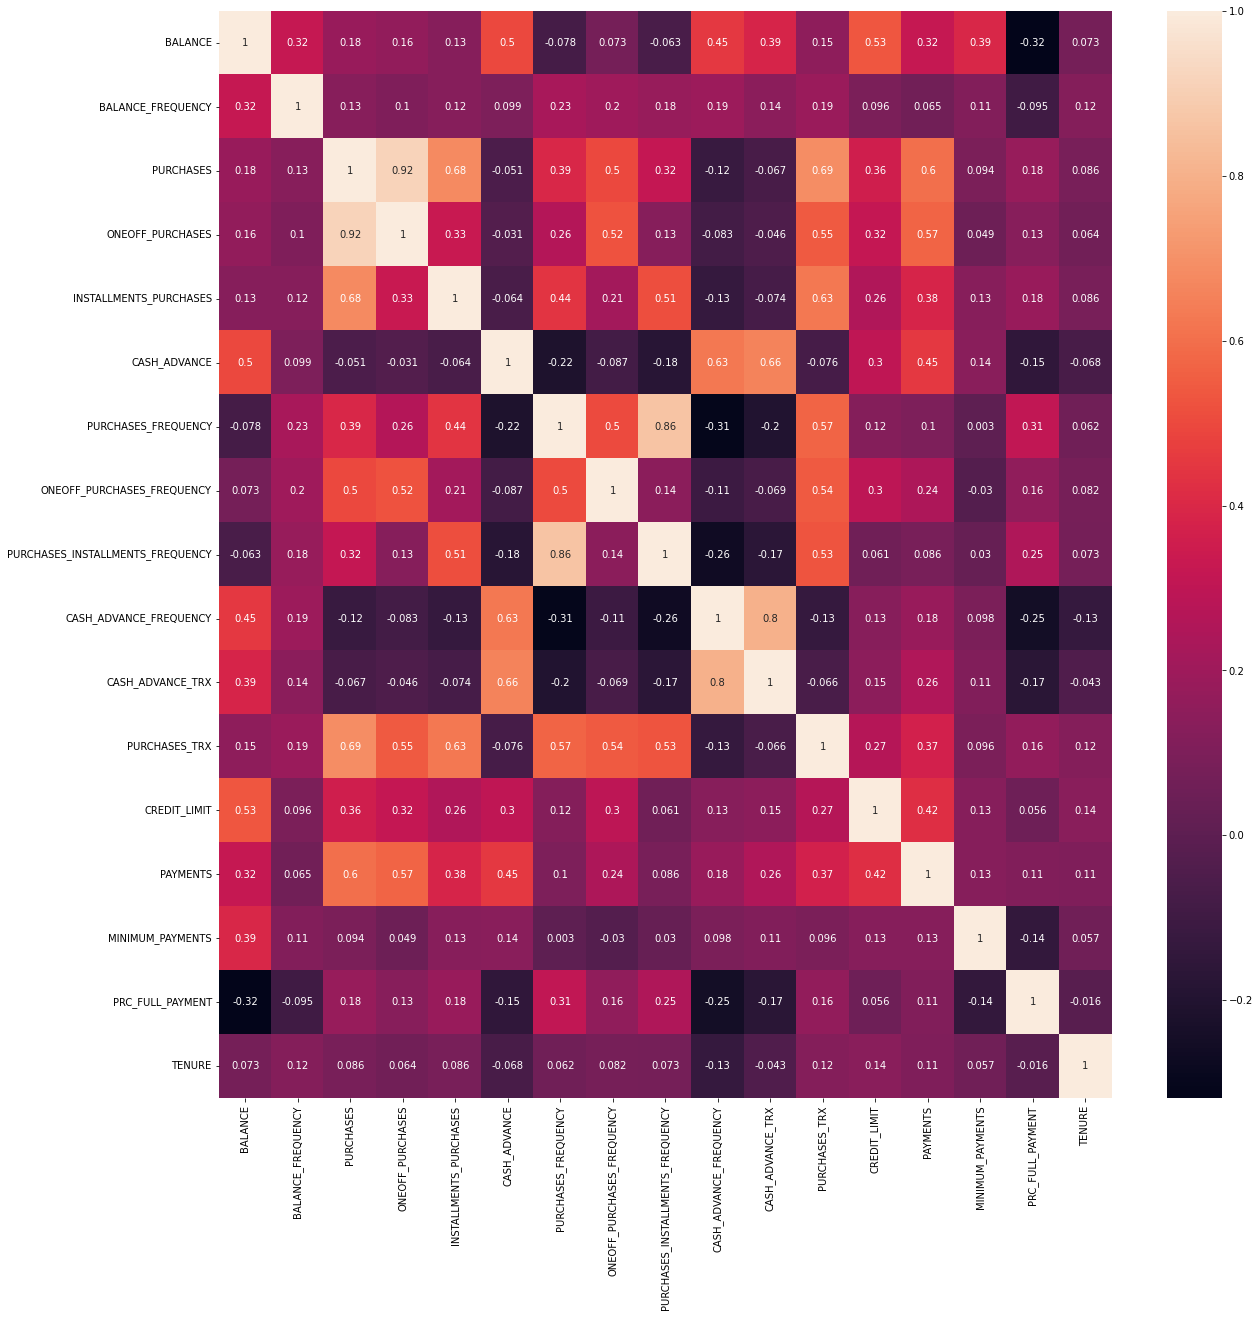

In [20]:
# 히트맵으로 상관관계 살펴보기
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)
# 강한 정적 상관관계 확인하기.
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

##K-MEANS (K 평균 알고리즘)

In [21]:
# elbow Method를 통해, 최적의 파라미터 K를 구하기
# 이것을 활용하기 위해서, Within Cluster Sum of Squares(WCSS)을 구해야 한다.(군집 내 제곱의 합)
# 각 데이터들의 좌표들과 중심점의 거리를 계산
# 각 Pi들 끼리의 거리 또한 계산한다.
# Pi와 C1까지의 거리를 계산하고, 제곱한 후 또 다른 Pi와 C1과의 거리를 계산해서 제곱한 후 각 데이터마다 계산한 제곱 값을 모두 더해줍니다.
# 이렇게 하면 첫번째 군집1의 값이 구해진다.
# 즉, 최적의 K 값(군집의 수)을 얻어냄으로써 최적화를 통한 최상의 결과를 얻게 된다.

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD
# elbow 메서드 사용!!

In [22]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [23]:
creditcard_df.shape
# 대략 9,000행, 17개의 features

(8950, 17)

In [24]:
# 알고리즘을 사용하기 전에 데이터스케일링은 필수적인것!
creditcard_df_scaled

#데이터스케일링에 대한 개념 더 공부 필수

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [25]:
# elbow method 적용하기
scores_1 = []
# 20번 반복해서 scores_1에 데이터 저장
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)


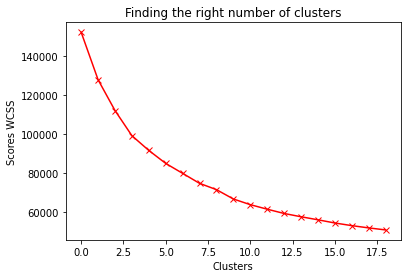

In [26]:
plt.plot(scores_1, 'rx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

# 7 ~10 까지의 구간에서 변화가 적게 나타난다고 보여진다.( 사람에 따라 다름.)

# TASK #6: APPLY K-MEANS METHOD

In [28]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [29]:
labels

array([7, 1, 6, ..., 5, 5, 5], dtype=int32)

In [30]:
kmeans.cluster_centers_.shape         

(8, 17)

In [31]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])

In [41]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,105.872392,0.369742,341.256762,203.453753,138.053897,307.806878,0.267925,0.070804,0.189843,0.030910,0.681319,4.306002,3861.952193,1178.466249,266.676518,0.237304,11.785292
1,5008.329675,0.971126,526.546064,328.099346,198.559435,5110.435943,0.295187,0.138621,0.195049,0.515428,16.161863,7.929047,8146.568232,3997.968322,2115.568528,0.037911,11.621951
2,3850.095172,0.989871,6520.335401,3647.025494,2875.161759,674.722728,0.959722,0.672002,0.877881,0.080990,2.351852,95.401235,9368.209877,6062.102494,2293.325648,0.227064,11.966049
3,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
4,819.091937,0.955908,938.132831,193.157536,745.418171,220.758646,0.890159,0.088850,0.844192,0.040815,0.798711,19.537928,3548.646605,1115.626668,794.592187,0.245174,11.859197
5,868.793568,0.795457,390.010464,239.326032,151.164432,1121.829931,0.409150,0.117853,0.274475,0.196855,3.251200,5.078400,2446.423119,600.208404,376.545946,0.157695,7.236800
6,1313.426805,0.972618,2242.340232,1761.242689,481.097542,280.826483,0.891114,0.773650,0.449053,0.050650,0.952805,31.191451,6200.424998,2235.861981,500.305503,0.289757,11.885129
7,1566.877836,0.972757,246.617740,196.927064,49.870501,752.015413,0.152895,0.088509,0.065731,0.151948,2.964390,2.840116,3356.619428,995.925071,831.981493,0.020534,11.882994


In [32]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.700774,-2.142458,-0.309826,-0.234356,-0.301910,-0.320004,-0.554195,-0.441318,-0.439313,-0.520884,-0.376232,-0.418560,-0.173839,-0.191605,-0.256400,0.285792,0.200241
1,1.654573,0.396195,-0.223101,-0.159259,-0.235001,1.970183,-0.486270,-0.213988,-0.426214,1.900370,1.892224,-0.272800,1.003768,0.782349,0.536960,-0.395932,0.078186
2,1.098109,0.475325,2.582303,1.840340,2.724901,-0.145037,1.169487,1.573967,1.291923,-0.270620,-0.131439,3.246321,1.339531,1.495373,0.613235,0.250781,0.335310
3,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
4,-0.358113,0.331954,-0.030457,-0.240560,0.369739,-0.361514,0.996162,-0.380825,1.207157,-0.471384,-0.359030,0.194241,-0.259950,-0.213312,-0.029872,0.312698,0.255466
5,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.562891,-0.391355,-0.209255,0.013610,-3.198580
6,-0.120614,0.402494,0.579980,0.704186,0.077442,-0.332870,0.998543,1.914701,0.212910,-0.422237,-0.336450,0.663077,0.468880,0.173656,-0.156150,0.465128,0.274843
7,0.001155,0.403082,-0.354122,-0.238289,-0.399427,-0.108179,-0.840805,-0.381970,-0.751603,0.083974,-0.041680,-0.477534,-0.312727,-0.254661,-0.013828,-0.455344,0.273248


In [33]:
labels.shape

(8950,)

In [34]:
labels.max()
# 8개의 군집을 가지고 있으니, 0부터 7까지가 된다

7

In [35]:
labels.min()

0

In [36]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [37]:
# 각 인덱스에 있는 데이터가 어디 군집에 속하는지 표현해주기 위해서, 가장 오른쪽에 어느 군집인지를 나타내주는 새로운 컬럼 추가하기
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis =1)
creditcard_df_cluster.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


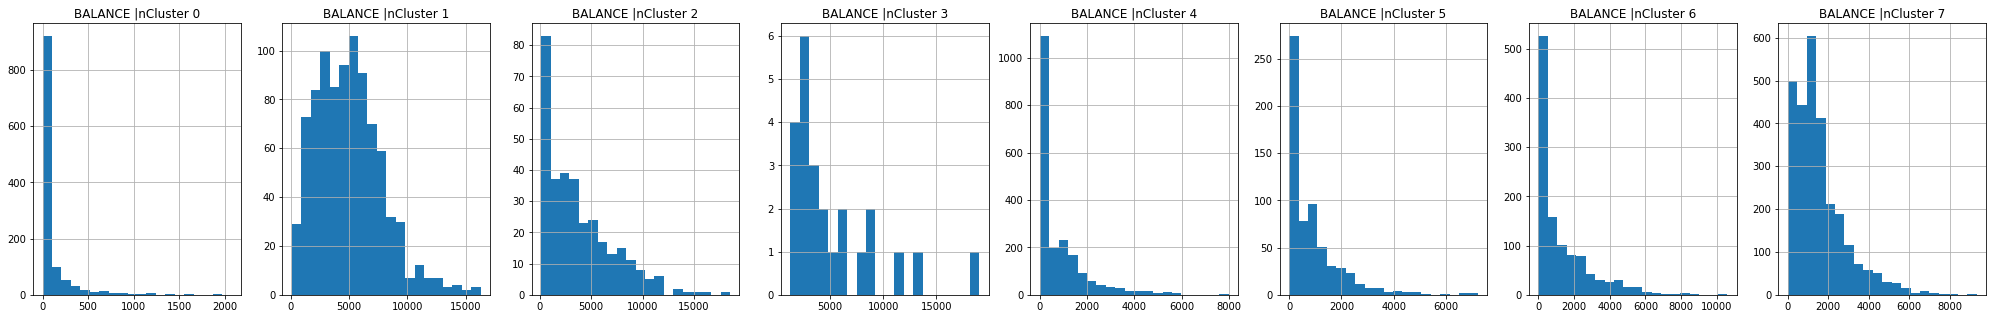

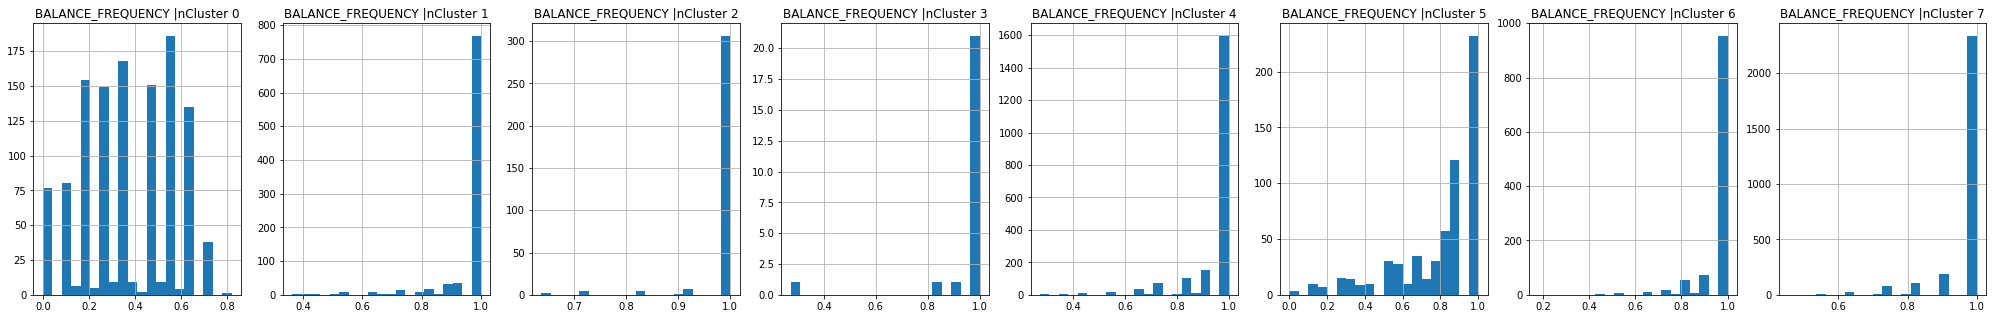

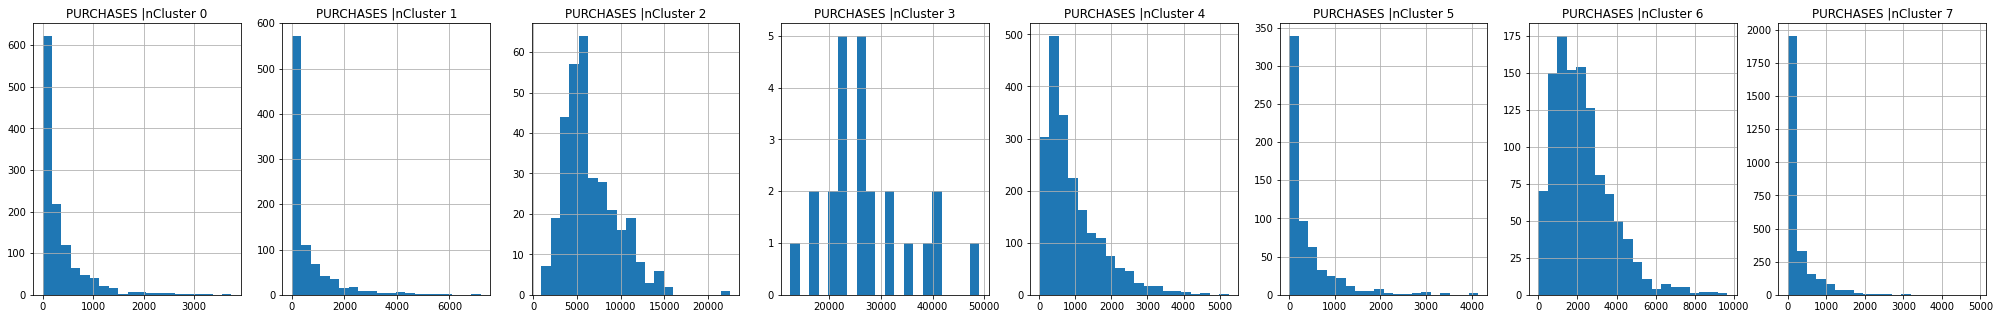

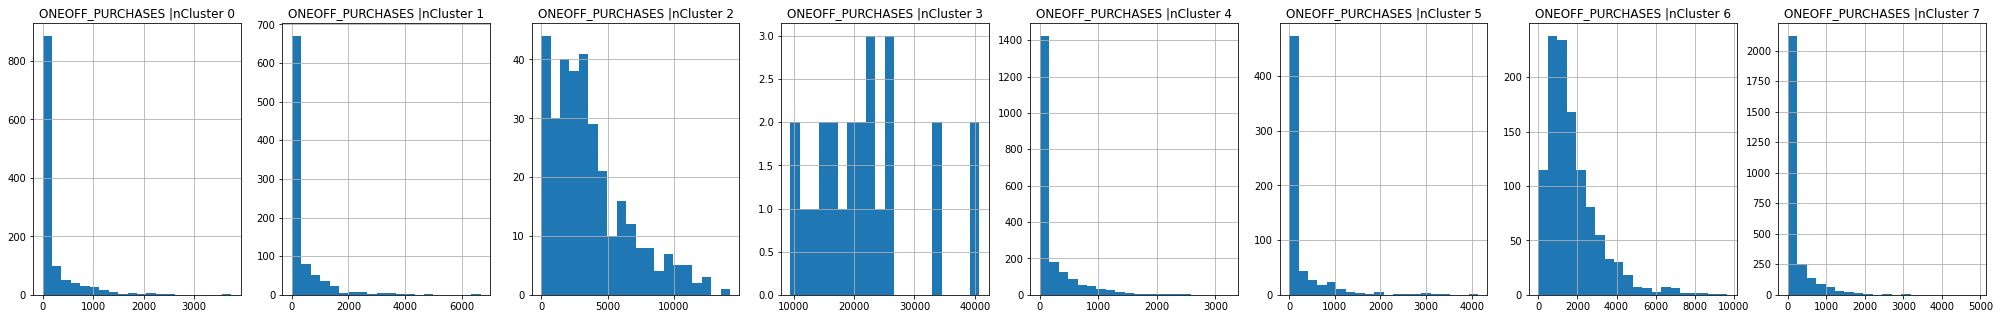

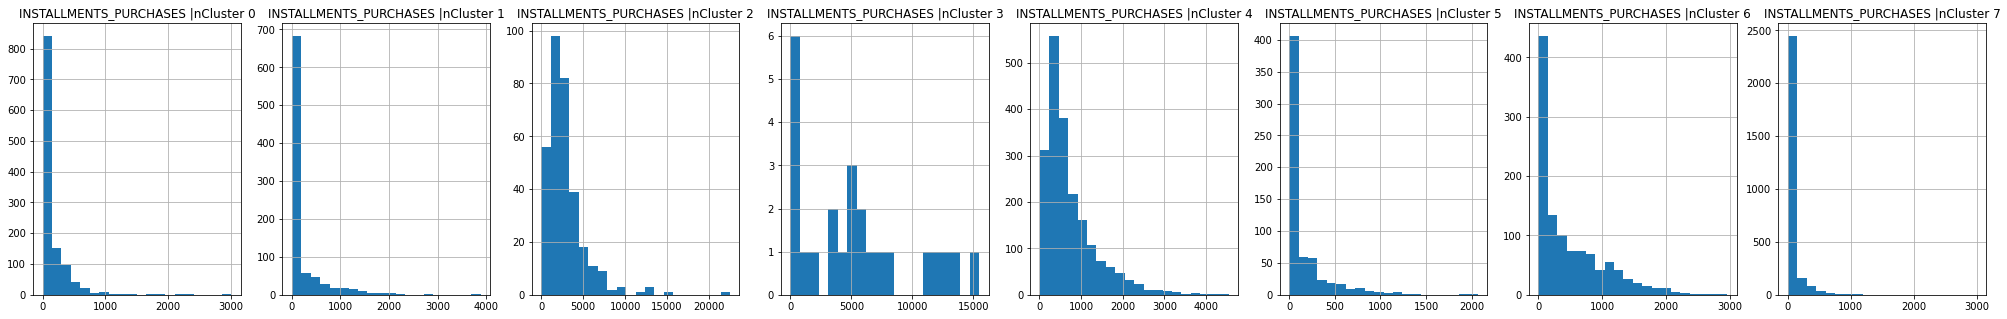

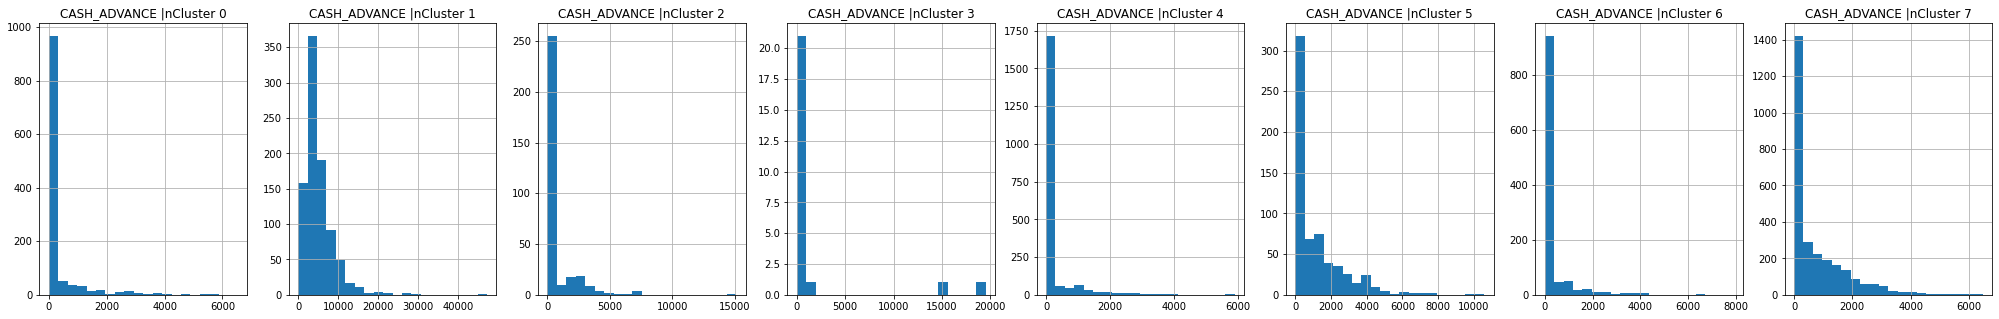

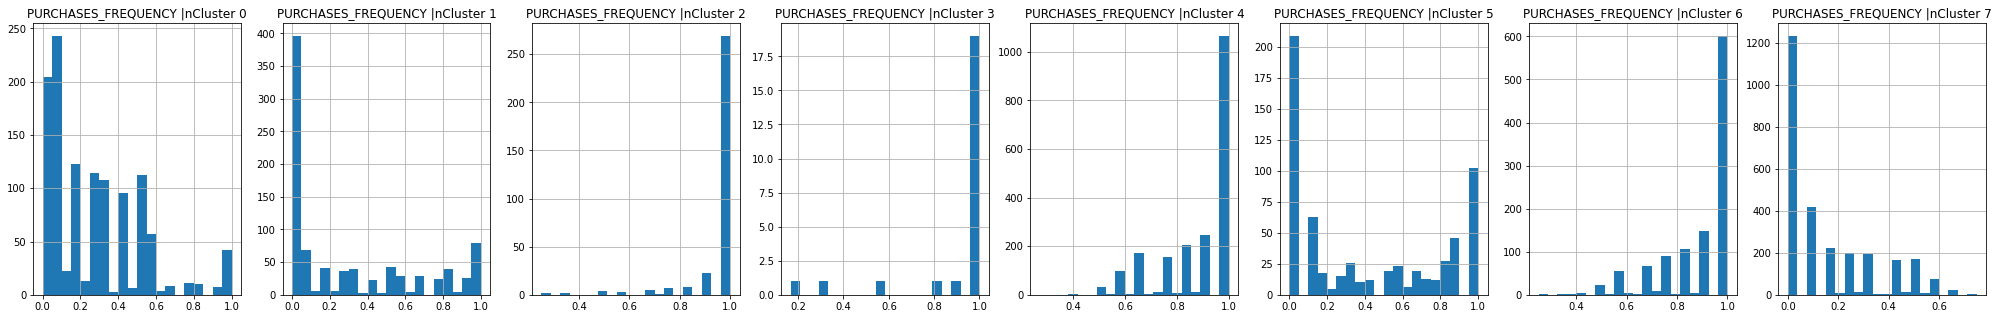

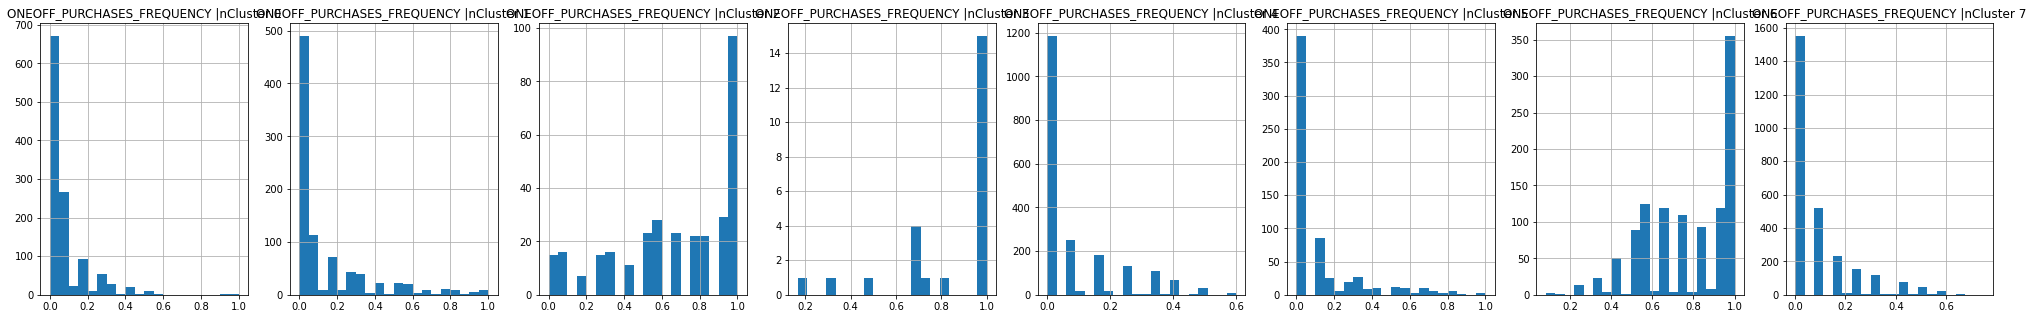

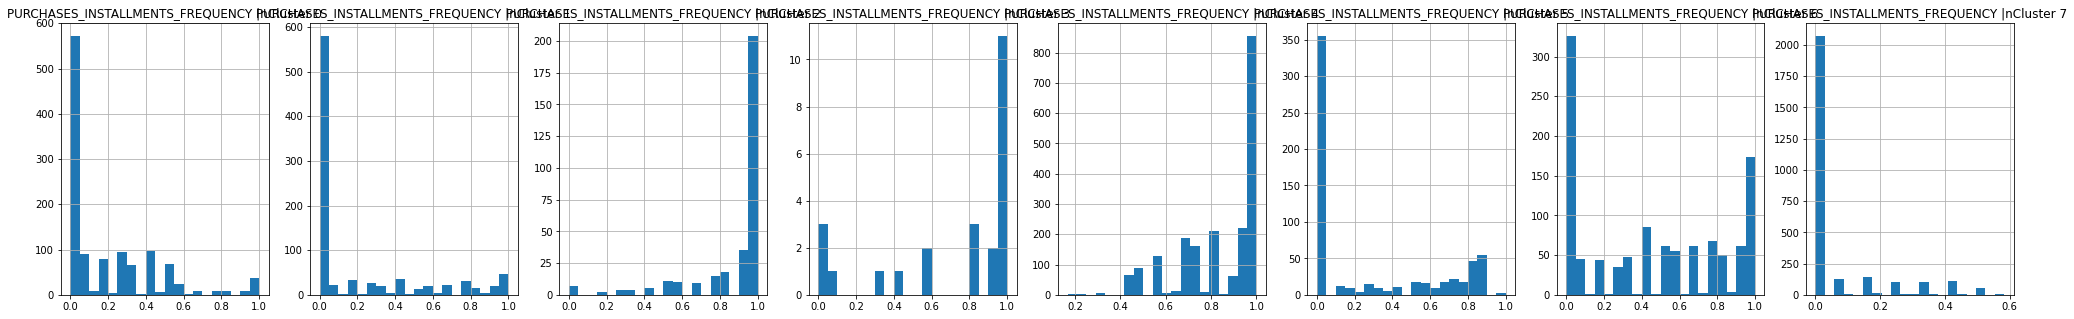

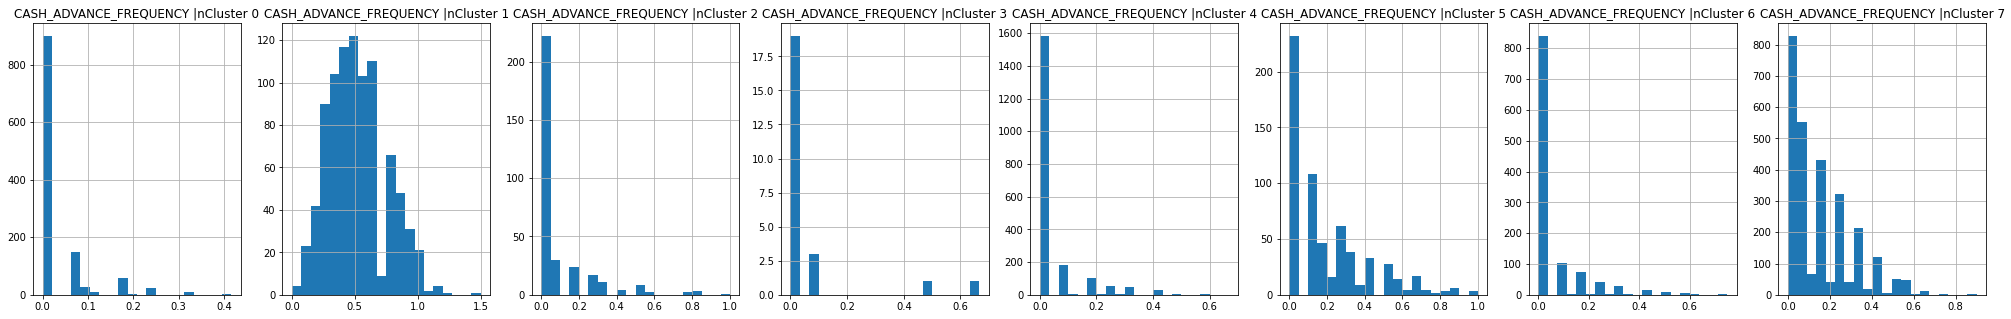

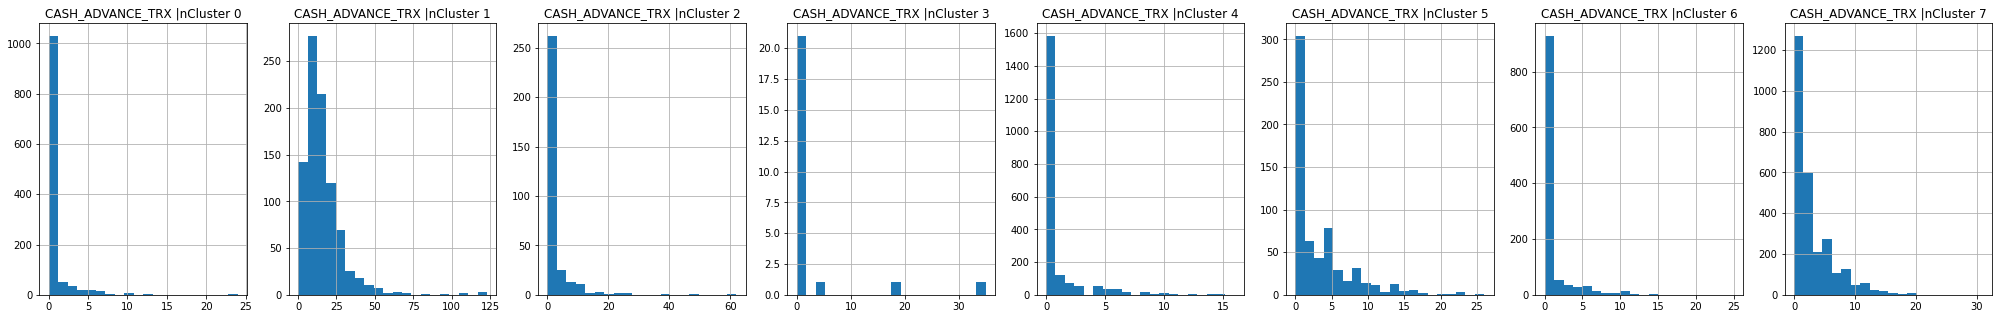

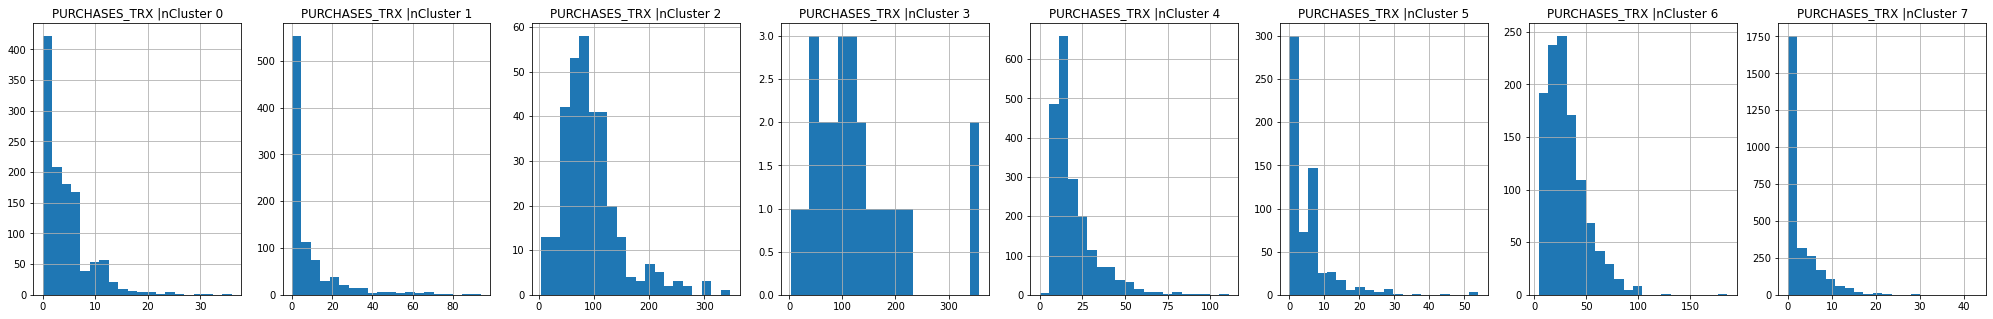

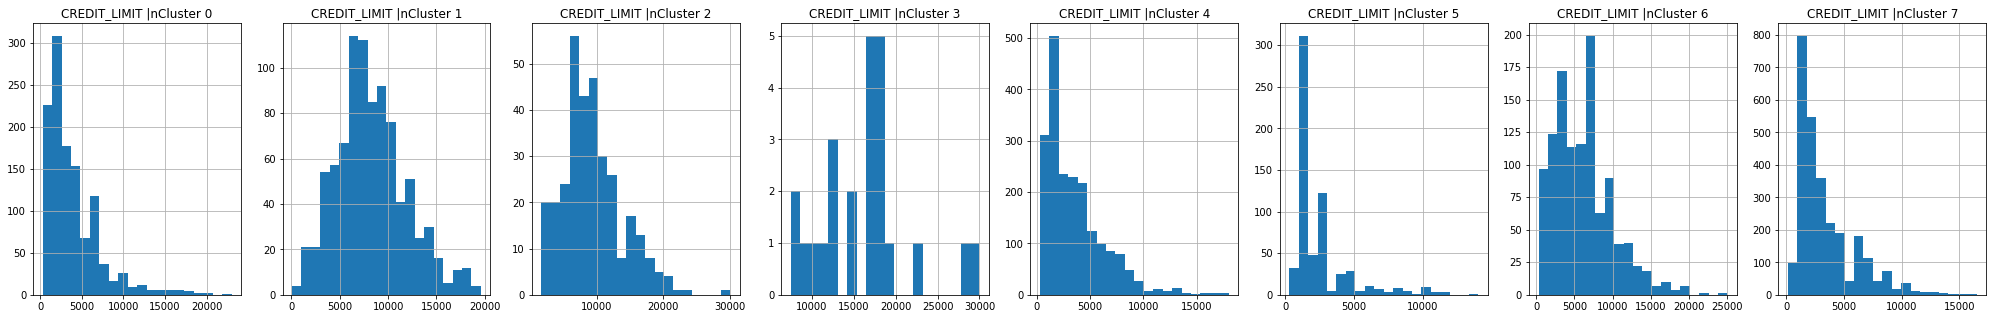

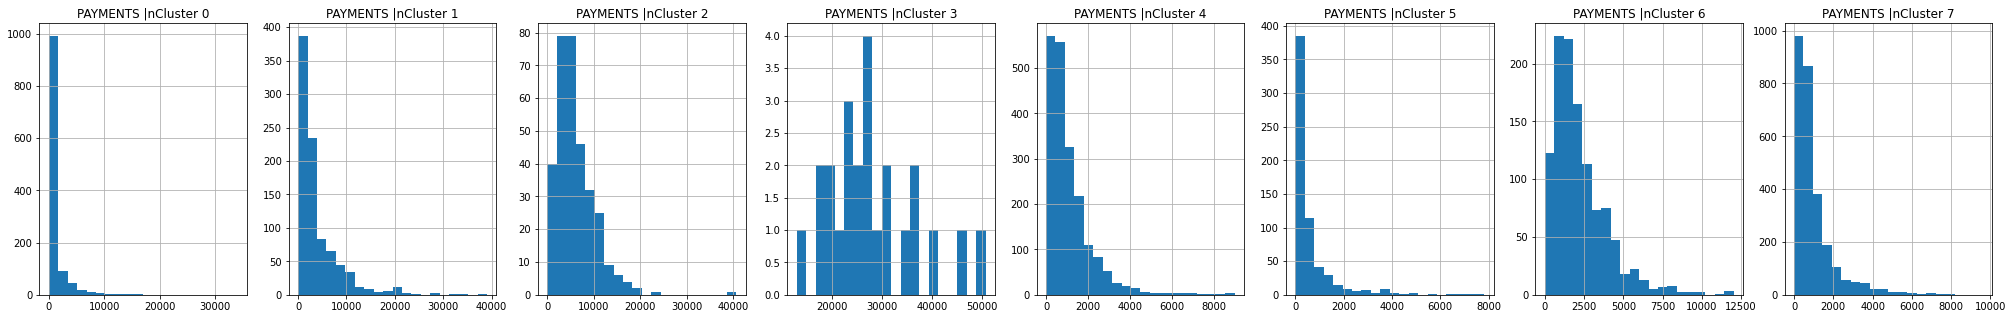

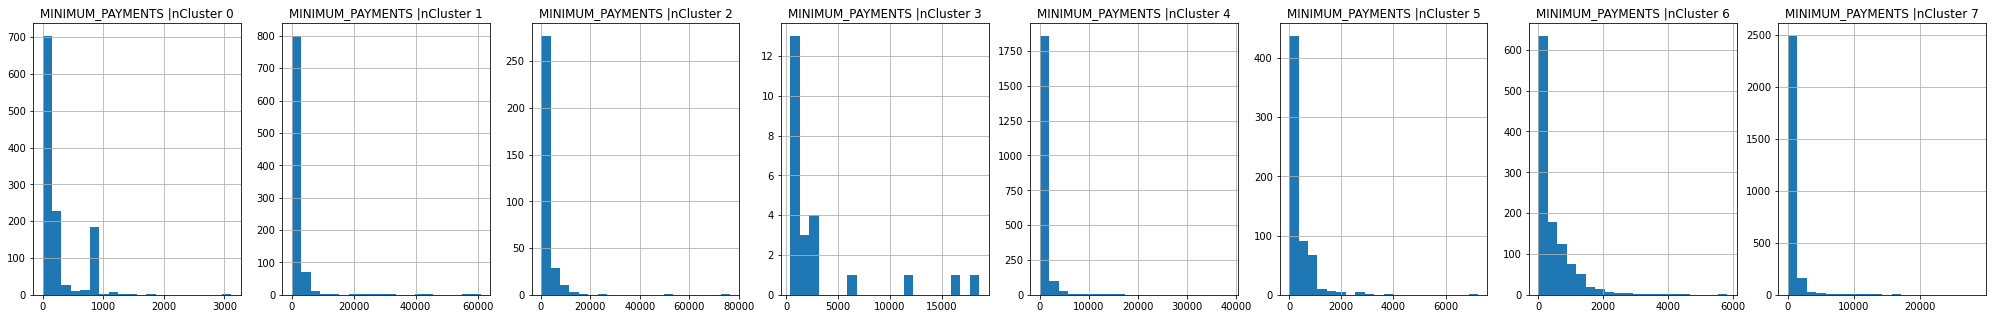

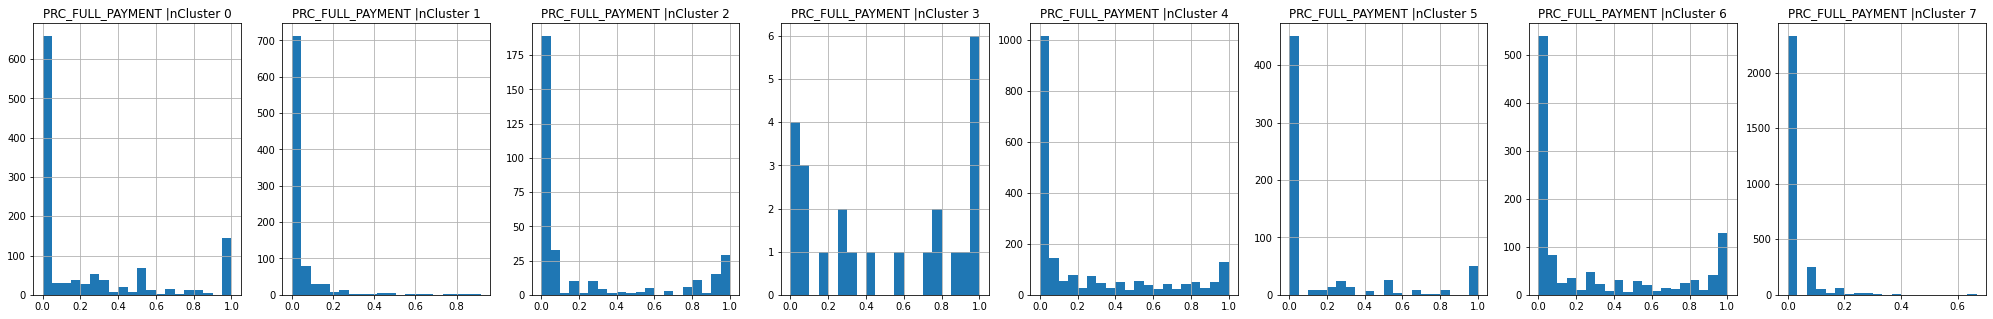

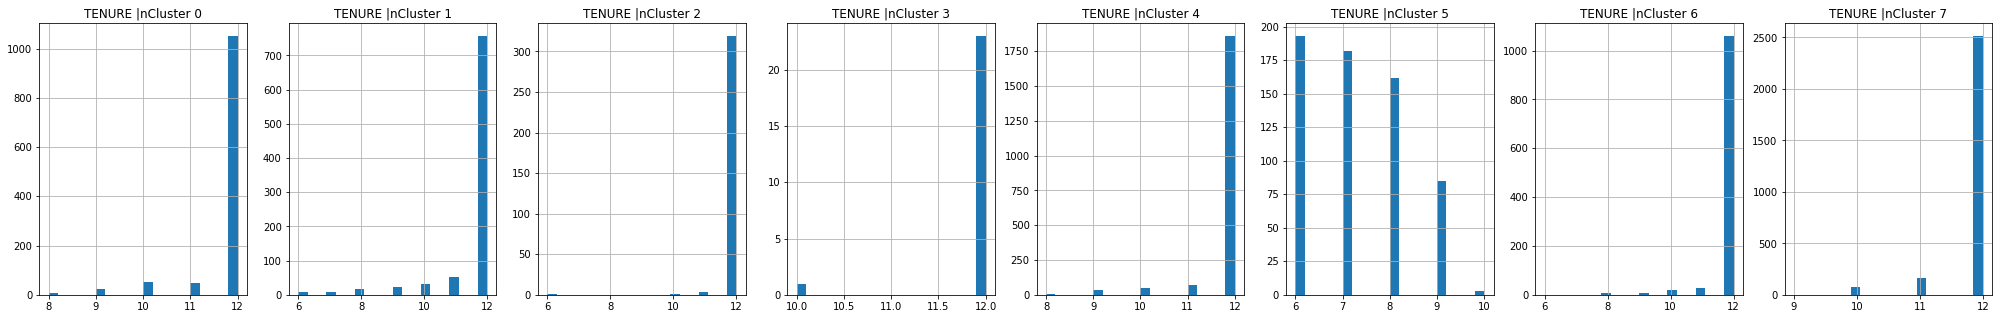

In [40]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
    cluster[i].hist(bins = 20)
    plt.title('{} |nCluster {}'.format(i,j))

plt.show()

# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS
## 주성분 분석(PCA)을 적용하여, 차원축소를 수행, 데이터시각화.
정보를 잃지 않은 채로, 차원만 줄여지게 > 이런 과정을 차원축소.

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [42]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

#성분의 수를 2개로 지정했기 때문에, 두 개의 열이 보인다.

array([[-1.68221934, -1.07644626],
       [-1.13828411,  2.50653806],
       [ 0.96968426, -0.3835147 ],
       ...,
       [-0.92620685, -1.81080446],
       [-2.33655029, -0.65795149],
       [-0.55641906, -0.40043999]])

In [47]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()


,pca1,pca2
0,-1.682219,-1.076446
1,-1.138284,2.506538
2,0.969684,-0.383515
3,-0.873634,0.043115
4,-1.599431,-0.688557


In [48]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()


,pca1,pca2,cluster
0,-1.682219,-1.076446,7
1,-1.138284,2.506538,1
2,0.969684,-0.383515,6
3,-0.873634,0.043115,7
4,-1.599431,-0.688557,7


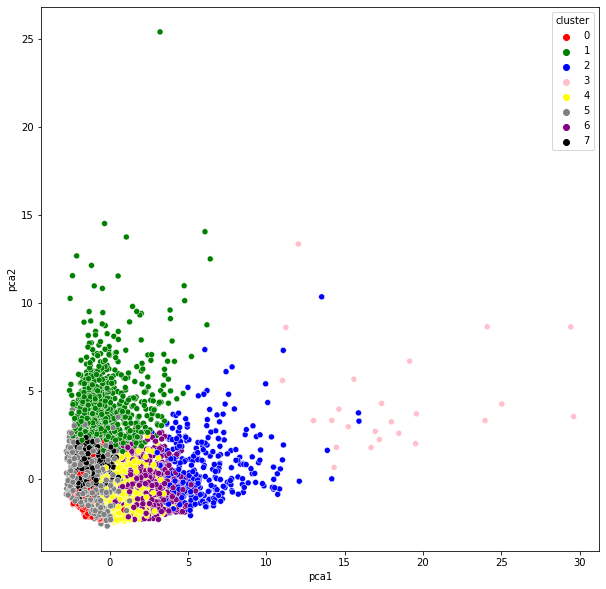

In [50]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',hue='cluster', data = pca_df, palette=['red','green','blue','pink','yellow','gray','purple','black'])
# hue는 k-평균 알고리즘을 사용해 얻은 것들.

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

오토인코더: 파이프라인의 중간에 병목(네트워크가 인풋을 압축시켜 인코딩되도록 강제하는 역할이다)을 만들어, 인풋데이터와 똑같은 아웃풋 데이터를 재구성해내는 것. (오토인코더를 훈련시킬 떄는 실제로 동일한 인풋과 동일한 아웃풋 데이터를 사용한다.) (차원을 축소하고 압축하면서 정보가 소실되지 않도록 하는것, 즉 용량을 줄이는 것, 그리고 코드층에 다다르면, 이 데이터를 다시 업샘플링 하여 이미지를 동일하게 재구성해낸다.) 



![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

(8950, 17)

Epoch 1/25
70/70 [==============================] - 4s 57ms/step - loss: 0.4943
Epoch 2/25
70/70 [==============================] - 4s 57ms/step - loss: 0.2985
Epoch 3/25
70/70 [==============================] - 4s 56ms/step - loss: 0.2192
Epoch 4/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1879
Epoch 5/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1729
Epoch 6/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1595
Epoch 7/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1395
Epoch 8/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1300
Epoch 9/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1157
Epoch 10/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1067
Epoch 11/25
70/70 [==============================] - 4s 56ms/step - loss: 0.0907
Epoch 12/25
70/70 [==============================] - 4s 56ms/step - loss: 0.0884
Epoch 13/25
70/70 [==================

(8950, 10)

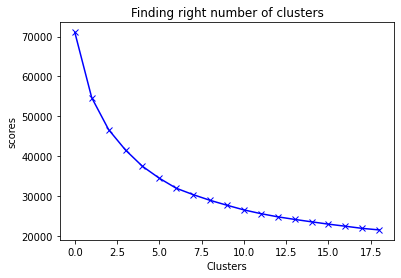

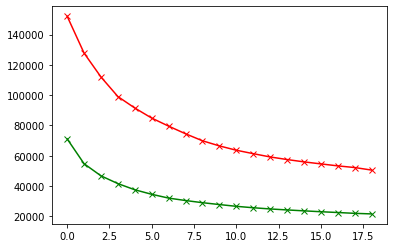

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


,pca1,pca2
0,-1.682221,-1.076451
1,-1.138299,2.506482
2,0.969680,-0.383501
3,-0.873630,0.043168
4,-1.599433,-0.688583


,pca1,pca2,cluster
0,-1.682221,-1.076451,3
1,-1.138299,2.506482,3
2,0.969680,-0.383501,3
3,-0.873630,0.043168,2
4,-1.599433,-0.688583,3


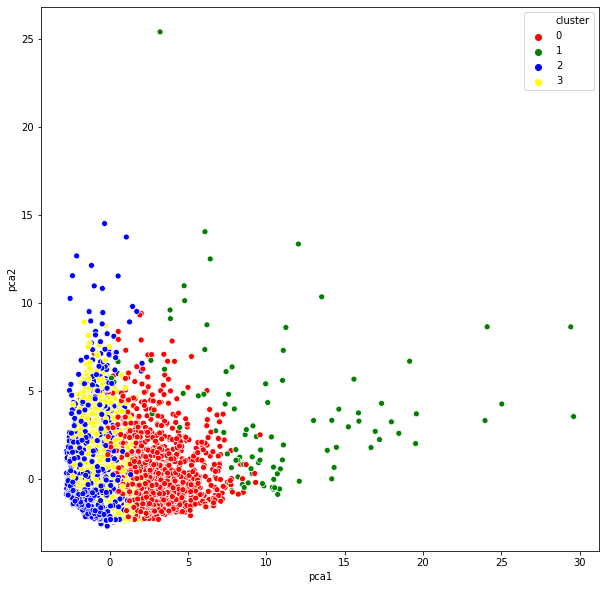

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS